# AIRCRAFT PURCHASE ANALYSIS #

### Project Overview ###
We are analyzing data about aviation accidents to help the business make safer investments in aircraft. The goal is to understand which aircraft models have a lower risk profile based on past accident data.

### Business Problem ###
Our company is expanding into the aviation industry. Before purchasing aircraft, we need to understand the risks associated with different models. By analyzing historical accident data, we can make recommendations for safer investments in commercial and private aircraft.

In [1]:
# Importing necessary libraries
# pandas is used for handling and analyzing data
import pandas as pd
# numpy is used for numerical operations
import numpy as np
# matplotlib is used to create charts and visualizations
import matplotlib.pyplot as plt

The dataset contains historical accident data from 1962 to 2023, gathered by the National Transportation Safety Board (NTSB). We will use this data to assess risks and help the company identify the safest aircraft to purchase.

In [2]:
#Import the data
aviation_data = pd.read_csv(r"AviationData.csv", low_memory = False, encoding='latin1')
states_data = pd.read_csv(r"USState_Codes.csv", encoding = 'latin1')


### Data Overview

The aviation dataset contains **31 columns** and nearly **90,000 entries**. It covers a wide range of categories for each incident, including:
- **Investigation type**, 
- **Make and model** of the aircraft,
- **Weather** and **location** data,
- **Flight details**,
- **Damage to the plane** and **passenger injuries**,
- **Regulation** data, and more.

Although the dataset has a lot of missing data, we will clean and prepare it to ensure accurate conclusions.

Additionally, the **US State Codes** dataset has two columns: 
- **State names** and their corresponding **codes**. 
- There is no missing data, and all entries are of object data type.

Both datasets will be prepared and cleaned, and visualizations will be created to help guide the **final recommendations**.

# DATA CLEANING #
### DATA PREPARATION ###

In this section we will prepare the data by making decisions on which data to use and which data to remove or replace

In [3]:
#REMOVING ALL THE UNCESSARY COLUMNS
aviation_data = aviation_data.drop(['FAR.Description','Schedule', 'Purpose.of.flight', 'Registration.Number', 
                                         'Publication.Date', 'Airport.Code', 'Airport.Name', 'Amateur.Built', 'Latitude', 'Longitude', 'Accident.Number', 'Engine.Type', 'Broad.phase.of.flight'], axis = 1)

aviation_data

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,1.0,NaN,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,1.0,NaN,4.0,0.0,0.0,0.0,UNK,Probable Cause
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,1.0,NaN,3.0,NaN,NaN,NaN,IMC,Probable Cause
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,1.0,NaN,2.0,0.0,0.0,0.0,IMC,Probable Cause
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,PIPER,PA-28-151,NaN,NaN,0.0,1.0,0.0,0.0,NaN,NaN
88885,20221227106494,Accident,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,BELLANCA,7ECA,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
88886,20221227106497,Accident,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,1.0,NaN,0.0,0.0,0.0,1.0,VMC,NaN
88887,20221227106498,Accident,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,CESSNA,210N,NaN,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN


In [4]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Country                 88663 non-null  object 
 5   Injury.Severity         87889 non-null  object 
 6   Aircraft.damage         85695 non-null  object 
 7   Aircraft.Category       32287 non-null  object 
 8   Make                    88826 non-null  object 
 9   Model                   88797 non-null  object 
 10  Number.of.Engines       82805 non-null  float64
 11  Air.carrier             16648 non-null  object 
 12  Total.Fatal.Injuries    77488 non-null  float64
 13  Total.Serious.Injuries  76379 non-null  float64
 14  Total.Minor.Injuries    76956 non-null

In [5]:
# Display number of nulls in each column
aviation_data.isna().sum()

Event.Id                      0
Investigation.Type            0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Number.of.Engines          6084
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Report.Status              6384
dtype: int64

In [6]:
# Country column values 
aviation_data['Country'].value_counts()

Country
United States                       82248
Brazil                                374
Canada                                359
Mexico                                358
United Kingdom                        344
                                    ...  
Seychelles                              1
Palau                                   1
Libya                                   1
Saint Vincent and the Grenadines        1
Turks and Caicos Islands                1
Name: count, Length: 219, dtype: int64

In [7]:
#Only keeping USA country
aviation_data = aviation_data[aviation_data['Country'] == 'United States']
aviation_data

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,1.0,NaN,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,1.0,NaN,4.0,0.0,0.0,0.0,UNK,Probable Cause
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,1.0,NaN,3.0,NaN,NaN,NaN,IMC,Probable Cause
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,1.0,NaN,2.0,0.0,0.0,0.0,IMC,Probable Cause
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,PIPER,PA-28-151,NaN,NaN,0.0,1.0,0.0,0.0,NaN,NaN
88885,20221227106494,Accident,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,BELLANCA,7ECA,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
88886,20221227106497,Accident,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,1.0,NaN,0.0,0.0,0.0,1.0,VMC,NaN
88887,20221227106498,Accident,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,CESSNA,210N,NaN,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN


In [8]:
aviation_data['Country'].value_counts()

Country
United States    82248
Name: count, dtype: int64

In [9]:
# Aircraft category values
aviation_data['Aircraft.Category'].value_counts()

Aircraft.Category
Airplane             24229
Helicopter            2723
Glider                 503
Balloon                229
Gyrocraft              172
Weight-Shift           161
Powered Parachute       90
Ultralight              25
WSFT                     9
Unknown                  4
Blimp                    4
Powered-Lift             3
Rocket                   1
ULTR                     1
Name: count, dtype: int64

In [10]:
# Dropping aircrafts that arent airplanes because we only want airplanes
aviation_data = aviation_data[aviation_data['Aircraft.Category'] == 'Airplane']

In [11]:
aviation_data['Aircraft.Category'].value_counts()

Aircraft.Category
Airplane    24229
Name: count, dtype: int64

In [12]:
# drop nulls in Model and Model column
aviation_columns = aviation_data.dropna(subset = ['Model', 'Make'])
aviation_columns

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
5,20170710X52551,Accident,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,2.0,Air Canada,NaN,NaN,1.0,44.0,VMC,Probable Cause
7,20020909X01562,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,1.0,NaN,0.0,0.0,0.0,2.0,VMC,Probable Cause
8,20020909X01561,Accident,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,401B,2.0,NaN,0.0,0.0,0.0,2.0,IMC,Probable Cause
12,20020917X02148,Accident,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,1.0,NaN,0.0,0.0,1.0,0.0,IMC,Probable Cause
13,20020917X02134,Accident,1982-01-02,"HEARNE, TX",United States,Fatal(1),Destroyed,Airplane,Cessna,R172K,1.0,NaN,1.0,0.0,0.0,0.0,IMC,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88869,20221213106455,Accident,2022-12-13,"Lewistown, MT",United States,Non-Fatal,Substantial,Airplane,PIPER,PA42,2.0,NaN,0.0,0.0,0.0,1.0,NaN,NaN
88873,20221215106463,Accident,2022-12-14,"San Juan, PR",United States,Non-Fatal,Substantial,Airplane,CIRRUS DESIGN CORP,SR22,1.0,SKY WEST AVIATION INC TRUSTEE,0.0,0.0,0.0,1.0,VMC,NaN
88876,20221219106475,Accident,2022-12-15,"Wichita, KS",United States,Non-Fatal,Substantial,Airplane,SWEARINGEN,SA226TC,2.0,NaN,0.0,0.0,0.0,1.0,NaN,NaN
88877,20221219106470,Accident,2022-12-16,"Brooksville, FL",United States,Minor,Substantial,Airplane,CESSNA,R172K,1.0,GERBER RICHARD E,0.0,1.0,0.0,0.0,VMC,NaN


In [13]:
aviation_data['Make'].value_counts()

Make
CESSNA             4264
Cessna             3461
PIPER              2496
Piper              1840
BEECH               890
                   ... 
Mcculley Ronald       1
Dwight Lohr           1
Bernhard              1
MCCULLOCH JERRY       1
ORLICAN S R O         1
Name: count, Length: 3707, dtype: int64

In [14]:
#injury severity column values
aviation_data['Injury.Severity'].value_counts()

Injury.Severity
Non-Fatal     19865
Fatal          3029
Fatal(1)        359
Fatal(2)        244
Incident        167
Minor           157
Serious         114
Fatal(3)         80
Fatal(4)         63
Fatal(5)         23
Fatal(6)         15
Fatal(7)          9
Fatal(8)          7
Fatal(10)         4
Fatal(12)         3
Fatal(9)          1
Fatal(13)         1
Fatal(65)         1
Fatal(27)         1
Fatal(228)        1
Fatal(16)         1
Fatal(17)         1
Fatal(14)         1
Fatal(11)         1
Name: count, dtype: int64

In [15]:
aviation_data['Injury.Severity'].isna().sum()

81

In [16]:
# fill nans with non fatal
aviation_data['Injury.Severity'] = aviation_data['Injury.Severity'].fillna('Non-Fatal')

C:\Users\user\AppData\Local\Temp\ipykernel_9776\83358702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data['Injury.Severity'] = aviation_data['Injury.Severity'].fillna('Non-Fatal')


In [17]:
aviation_data['Injury.Severity'].isna().sum()

0

In [18]:
# Replace all entries containing 'Fatal(' with 'Fatal'
aviation_columns.loc[aviation_columns['Injury.Severity'].str.contains('Fatal\(', na=False), 'Injury.Severity'] = 'Fatal'

# Replace NaN values with 'Fatal'
aviation_columns['Injury.Severity'].fillna('Fatal', inplace=True)


<>:2: SyntaxWarning: invalid escape sequence '\('
<>:2: SyntaxWarning: invalid escape sequence '\('
C:\Users\user\AppData\Local\Temp\ipykernel_9776\245037731.py:2: SyntaxWarning: invalid escape sequence '\('
  aviation_columns.loc[aviation_columns['Injury.Severity'].str.contains('Fatal\(', na=False), 'Injury.Severity'] = 'Fatal'
C:\Users\user\AppData\Local\Temp\ipykernel_9776\245037731.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aviation_columns['Injury.Severity'].fillna('Fatal', inplace=True)
C:\Users\user\AppData\Loc

In [19]:
aviation_columns['Injury.Severity'].value_counts()

Injury.Severity
Non-Fatal    19848
Fatal         3921
Incident       165
Minor          157
Serious        114
Name: count, dtype: int64

In [20]:
aviation_columns['Total.Fatal.Injuries'].value_counts()

Total.Fatal.Injuries
0.0      17420
1.0       2077
2.0       1118
3.0        299
4.0        191
5.0         60
6.0         33
7.0         15
8.0         10
10.0         8
9.0          4
12.0         3
14.0         2
11.0         2
17.0         1
27.0         1
16.0         1
228.0        1
65.0         1
13.0         1
49.0         1
Name: count, dtype: int64

In [21]:
aviation_columns['Injury.Severity'].unique()

array(['Non-Fatal', 'Fatal', 'Incident', 'Minor', 'Serious'], dtype=object)

In [22]:
aviation_columns['Aircraft.damage'].value_counts()

Aircraft.damage
Substantial    20508
Destroyed       2666
Minor            507
Unknown           43
Name: count, dtype: int64

In [23]:
aviation_columns['Aircraft.damage'].isna().sum()

481

In [24]:
# replace aircraft damage nans with unknown
aviation_columns['Aircraft.damage'] = aviation_columns['Aircraft.damage'].fillna('Unknown')

C:\Users\user\AppData\Local\Temp\ipykernel_9776\1785998025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_columns['Aircraft.damage'] = aviation_columns['Aircraft.damage'].fillna('Unknown')


In [25]:
aviation_columns.describe() # see summary statistics for numerical columns

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,23583.000000,21249.000000,21270.000000,21613.000000,23493.000000
mean,1.132723,0.342322,0.278608,0.220423,4.306176
std,0.367482,1.892637,1.633074,0.822648,24.239808
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,228.000000,137.000000,50.000000,588.000000


In [26]:
# fill number of engines with mean
aviation_columns['Number.of.Engines'] = aviation_columns['Number.of.Engines'].fillna(aviation_columns['Number.of.Engines'].mean())

C:\Users\user\AppData\Local\Temp\ipykernel_9776\427457474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_columns['Number.of.Engines'] = aviation_columns['Number.of.Engines'].fillna(aviation_columns['Number.of.Engines'].mean())


In [27]:
# weather condition values and counts
aviation_columns['Weather.Condition'].value_counts()

Weather.Condition
VMC    22296
IMC     1294
Unk      111
UNK       58
Name: count, dtype: int64

In [28]:
# combine unknown columns in weather condition
aviation_columns['Weather.Condition'] = aviation_columns['Weather.Condition'].replace({'Unk' : 'UNK'})

C:\Users\user\AppData\Local\Temp\ipykernel_9776\3193432514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_columns['Weather.Condition'] = aviation_columns['Weather.Condition'].replace({'Unk' : 'UNK'})


In [29]:
aviation_columns['Weather.Condition'].isna().sum()

446

In [30]:
aviation_columns['Weather.Condition'].value_counts()

Weather.Condition
VMC    22296
IMC     1294
UNK      169
Name: count, dtype: int64

In [31]:
# filled weather condition nans with unknown
aviation_columns['Weather.Condition'] = aviation_columns['Weather.Condition'].fillna('UNK')

C:\Users\user\AppData\Local\Temp\ipykernel_9776\1779946441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_columns['Weather.Condition'] = aviation_columns['Weather.Condition'].fillna('UNK')


In [32]:
aviation_columns['Weather.Condition'].isna().sum()

0

In [33]:
aviation_columns['Report.Status'].isna().sum()

2176

In [34]:
aviation_columns['Report.Status'].value_counts()

Report.Status
Probable Cause                                                                                                                                                                                                                                                                                                                                                                                                                                          6364
The pilot's failure to maintain directional control during the landing roll.                                                                                                                                                                                                                                                                                                                                                                              56
A loss of engine power for undetermined reasons.                                                

In [35]:
aviation_columns = aviation_columns.dropna(subset = ['Report.Status'])

In [36]:
aviation_columns = aviation_columns[aviation_columns['Report.Status'] != 'Foreign']

In [37]:
aviation_columns = aviation_columns[aviation_columns['Report.Status'] != 'Probable Cause']

In [38]:
aviation_columns['Report.Status'].value_counts()

Report.Status
The pilot's failure to maintain directional control during the landing roll.                                                                                                                                                                            56
A loss of engine power for undetermined reasons.                                                                                                                                                                                                        49
The pilot's failure to maintain directional control during landing.                                                                                                                                                                                     43
A total loss of engine power for undetermined reasons.                                                                                                                                                                                   

In [39]:
aviation_columns['Event.Date'].value_counts()

Event.Date
2012-08-31    15
2011-03-19    14
2011-07-23    14
2010-05-29    14
2011-06-18    14
              ..
2012-12-16     1
2019-01-31     1
2019-01-30     1
2019-01-28     1
2022-11-09     1
Name: count, Length: 4720, dtype: int64

In [40]:
aviation_columns['Event.Date'] = aviation_columns['Event.Date'].map(lambda x: x[:4])

In [41]:
aviation_columns['Event.Date'].unique()

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype=object)

In [42]:
aviation_columns.isna().sum()

Event.Id                     0
Investigation.Type           0
Event.Date                   0
Location                     0
Country                      0
Injury.Severity              0
Aircraft.damage              0
Aircraft.Category            0
Make                         0
Model                        0
Number.of.Engines            0
Air.carrier               7131
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Weather.Condition            0
Report.Status                0
dtype: int64

In [43]:
# need to clean up make column
aviation_columns['Make'] = aviation_columns['Make'].map(lambda x: x.lower())

In [44]:
aviation_columns['Make'].value_counts()

Make
cessna                4638
piper                 2691
beech                  935
boeing                 291
mooney                 238
                      ... 
quasar acft co llc       1
moyes                    1
floyd joseph b           1
evens                    1
stephen j hoffman        1
Name: count, Length: 2690, dtype: int64

In [45]:
aviation_columns['Make'] = aviation_columns['Make'].map(lambda x: x.title())

In [46]:
# filters by top ten makes 
top_ten_makes = aviation_columns.Make.value_counts().nlargest(10)
topten_df = aviation_columns[aviation_columns.Make.isin(top_ten_makes.index)]

Text(0, 0.5, 'Frequency')

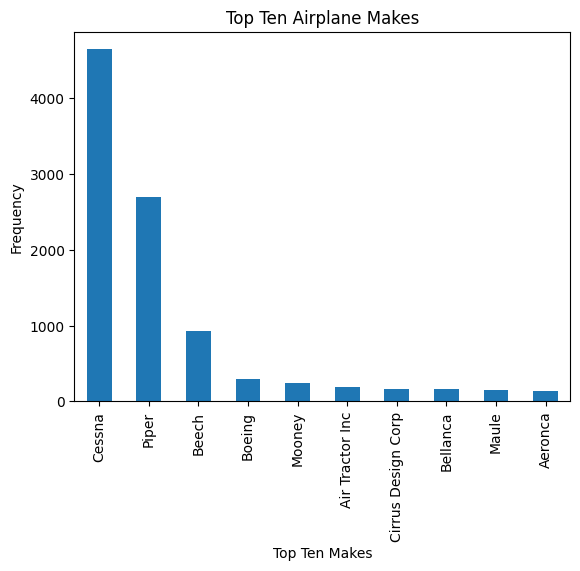

In [47]:
# plot top ten to show - might use this in analysis
# Setting up the plot
fig, ax = plt.subplots()
top_ten_makes.plot.bar()

ax.set_title('Top Ten Airplane Makes')
ax.set_xlabel('Top Ten Makes')
ax.set_ylabel('Frequency')

In [48]:
aviation_data

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
5,20170710X52551,Accident,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,2.0,Air Canada,NaN,NaN,1.0,44.0,VMC,Probable Cause
7,20020909X01562,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,1.0,NaN,0.0,0.0,0.0,2.0,VMC,Probable Cause
8,20020909X01561,Accident,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,401B,2.0,NaN,0.0,0.0,0.0,2.0,IMC,Probable Cause
12,20020917X02148,Accident,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,1.0,NaN,0.0,0.0,1.0,0.0,IMC,Probable Cause
13,20020917X02134,Accident,1982-01-02,"HEARNE, TX",United States,Fatal(1),Destroyed,Airplane,Cessna,R172K,1.0,NaN,1.0,0.0,0.0,0.0,IMC,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88869,20221213106455,Accident,2022-12-13,"Lewistown, MT",United States,Non-Fatal,Substantial,Airplane,PIPER,PA42,2.0,NaN,0.0,0.0,0.0,1.0,NaN,NaN
88873,20221215106463,Accident,2022-12-14,"San Juan, PR",United States,Non-Fatal,Substantial,Airplane,CIRRUS DESIGN CORP,SR22,1.0,SKY WEST AVIATION INC TRUSTEE,0.0,0.0,0.0,1.0,VMC,NaN
88876,20221219106475,Accident,2022-12-15,"Wichita, KS",United States,Non-Fatal,Substantial,Airplane,SWEARINGEN,SA226TC,2.0,NaN,0.0,0.0,0.0,1.0,NaN,NaN
88877,20221219106470,Accident,2022-12-16,"Brooksville, FL",United States,Minor,Substantial,Airplane,CESSNA,R172K,1.0,GERBER RICHARD E,0.0,1.0,0.0,0.0,VMC,NaN


In [49]:
topten_df.to_csv('topten_df.csv', sep=',')

In [50]:
# clean dataframe is called topten_df
topten_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9607 entries, 63915 to 88661
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                9607 non-null   object 
 1   Investigation.Type      9607 non-null   object 
 2   Event.Date              9607 non-null   object 
 3   Location                9607 non-null   object 
 4   Country                 9607 non-null   object 
 5   Injury.Severity         9607 non-null   object 
 6   Aircraft.damage         9607 non-null   object 
 7   Aircraft.Category       9607 non-null   object 
 8   Make                    9607 non-null   object 
 9   Model                   9607 non-null   object 
 10  Number.of.Engines       9607 non-null   float64
 11  Air.carrier             5400 non-null   object 
 12  Total.Fatal.Injuries    9607 non-null   float64
 13  Total.Serious.Injuries  9607 non-null   float64
 14  Total.Minor.Injuries    9607 non-null   

### Data Analysis

This analysis focuses on aviation accidents within the United States and international waters. The goal is to provide your company’s stakeholders with valuable insights, ultimately leading to recommendations about which aircraft models would be the most **profitable** while carrying the **least potential risk** for investment.

In [51]:
data = pd.read_csv(r'topten_df.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9607 entries, 0 to 9606
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              9607 non-null   int64  
 1   Event.Id                9607 non-null   object 
 2   Investigation.Type      9607 non-null   object 
 3   Event.Date              9607 non-null   int64  
 4   Location                9607 non-null   object 
 5   Country                 9607 non-null   object 
 6   Injury.Severity         9607 non-null   object 
 7   Aircraft.damage         9607 non-null   object 
 8   Aircraft.Category       9607 non-null   object 
 9   Make                    9607 non-null   object 
 10  Model                   9607 non-null   object 
 11  Number.of.Engines       9607 non-null   float64
 12  Air.carrier             5400 non-null   object 
 13  Total.Fatal.Injuries    9607 non-null   float64
 14  Total.Serious.Injuries  9607 non-null   

In [52]:
# Summarize data frame statistics
data.describe()

,Unnamed: 0,Event.Date,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,9607.000000,9607.000000,9607.000000,9607.000000,9607.000000,9607.000000,9607.000000
mean,74736.649110,2013.729989,1.129652,0.269907,0.300198,0.143333,4.054231
std,6510.109544,3.905393,0.345776,0.784846,2.270722,0.696174,22.769401
min,63915.000000,2008.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,69149.000000,2010.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,74495.000000,2013.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,80029.500000,2017.000000,1.000000,0.000000,0.000000,0.000000,2.000000
max,88661.000000,2022.000000,4.000000,11.000000,137.000000,50.000000,394.000000


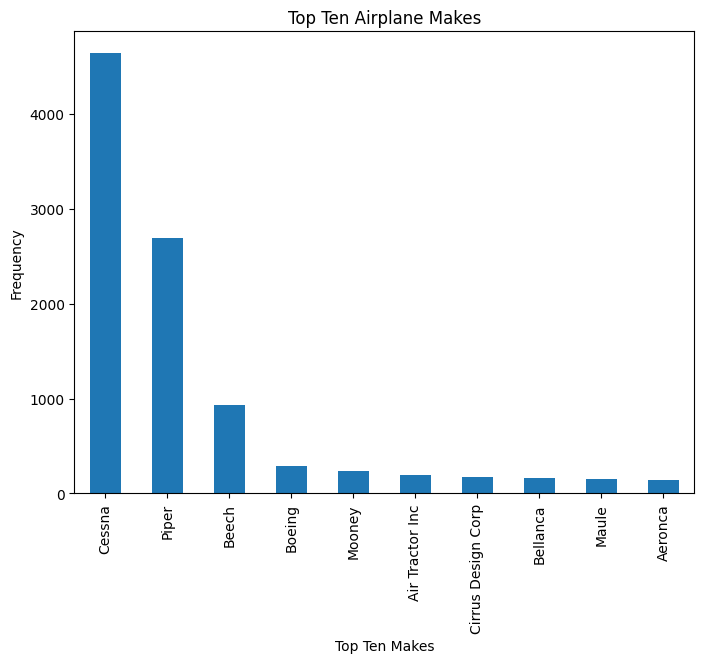

In [53]:
# plot top ten to show
# Setting up the plot
fig, ax = plt.subplots(figsize=(8,6))
top_ten_makes = data.Make.value_counts()
top_ten_makes.plot.bar()

ax.set_title('Top Ten Airplane Makes')
ax.set_xlabel('Top Ten Makes')
ax.set_ylabel('Frequency')

plt.savefig('Top Ten Airplane Makes')
# Displaying the plot
plt.show()

### Accident vs. Incident

When an event appears in this dataset, it means something went wrong, but there are two types of events:
- **Accident**: Defined as an event where an injury occurs.
- **Incident**: An occurrence where something went wrong but did not result in an accident, often due to the effectiveness of safety measures in place.

In the analysis below, we compare accidents and incidents to draw conclusions about which airplane makes have **sufficient safety measures** to prevent incidents from escalating into accidents.

In [54]:
# Create pivot table to illustrate count of accident and incident per make
grouped = data.pivot_table(index='Make', columns='Investigation.Type', aggfunc='size', fill_value=0)

In [55]:
# Add a new column for the ratio of accidents to total incidents and accidents
grouped['Ratio'] = grouped['Accident'] / (grouped['Accident'] + grouped['Incident'])

In [56]:
grouped.sort_values('Ratio')

Investigation.Type,Accident,Incident,Ratio
Make,,,
Boeing,212,79,0.728522
Cirrus Design Corp,159,10,0.940828
Beech,918,17,0.981818
Mooney,234,4,0.983193
Cessna,4580,58,0.987495
Piper,2670,21,0.992196
Bellanca,158,1,0.993711
Air Tractor Inc,191,1,0.994792
Aeronca,144,0,1.000000


### Table Overview

The table breaks down data by airplane make and includes the following metrics:
- **Accidents**: The total number of accidents.
- **Incidents**: The total number of incidents (including non-accidents).
- **Accident-to-Event Ratio**: The ratio of accidents to total events (accidents + incidents). 
   - A ratio closer to **1** indicates a higher frequency of accidents.
   - A ratio closer to **0** suggests better safety measures, as fewer incidents escalate into accidents.

This helps identify which airplane makes have effective safety measures to prevent incidents from turning into accidents.

---

### Key Findings

- **Boeing** has the **lowest accident-to-event ratio** at **0.7285**, indicating it has the best safety measures to prevent accidents.
- **Beech** and **Mooney** rank second and third, following Boeing closely.
- **Aeronca** and **Maule** tie for the highest accident-to-event ratio, indicating a higher risk of incidents escalating into accidents.

According to the table, **Boeing**, **Beech**, and **Mooney** stand out as having the **most efficient safety measures** in place.


### Pilots Negligence or Engine Failure ###
We want to further explore the sources behind all the accidents and incidents. After, getting a closer look into the Report Status column. there were some reoccurring words such as 'pilot', 'failure', and 'engine'. We created a new column in the dataset that go through each row in Report Status looking for specific key words ('pilot' and 'engine') and categorize them into two values: Human and Mechanical.

In [57]:
#creating a new column for human/mechanical error
data['source_cause'] = data['Report.Status'].str.contains(("pilot" or 
                                "pilot's" or "technician's" or "company maintenance personnel" or "student" or 
                                "instructor" or "failure")).astype('int').replace({1: 'Human', 0: 'Mechanical'})

### Focus on Top 10 Airplane Makes

In this analysis, we concentrated on the **top ten airplane makes** and **normalized the errors** (both human and mechanical) associated with each make. This approach allowed us to compare the error rates on a level playing field, giving us clearer insights into which makes are more prone to specific types of errors.

In [58]:
top_ten_make = ['Cessna', 'Piper', 'Beech', 'Air Tractor Inc', 'Boeing', 'Mooney', 'Cirrus Design Corp', 
                'Bellanca', 'Maule', 'Aeronca']
human_error = [3656, 2068, 676, 234, 73, 213, 188, 125, 128, 126]
mechanical_error = [1006, 639, 272, 70, 222, 65, 67, 34, 22, 19]
x = sum(human_error)
y = sum(mechanical_error)
total = x + y
total

9903

In [59]:
normalized_human_error = []

for error in human_error:
    normalize = int(error)/total
    normalized_human_error.append(normalize)

print(normalized_human_error)

[0.3691810562455822, 0.2088256084014945, 0.06826214278501465, 0.023629203271735837, 0.007371503584772291, 0.02150863374734929, 0.01898414621831768, 0.012622437645158033, 0.012925376148641825, 0.012723417146319298]


In [60]:
normalized_mechanical_error = []

for error in mechanical_error:
    normalize = int(error)/total
    normalized_mechanical_error.append(normalize)

print(normalized_mechanical_error)

[0.10158537816823185, 0.06452590124204786, 0.02746642431586388, 0.007068565081288498, 0.022417449257800665, 0.006563667575482177, 0.006765626577804705, 0.003433303039482985, 0.0022215490255478136, 0.001918610522064021]


In [61]:
dict = {'Makes': top_ten_make, 'Normalized Human Error': normalized_human_error, 'Normalized Mechanical Error': normalized_mechanical_error}
normalized_df = pd.DataFrame(dict)

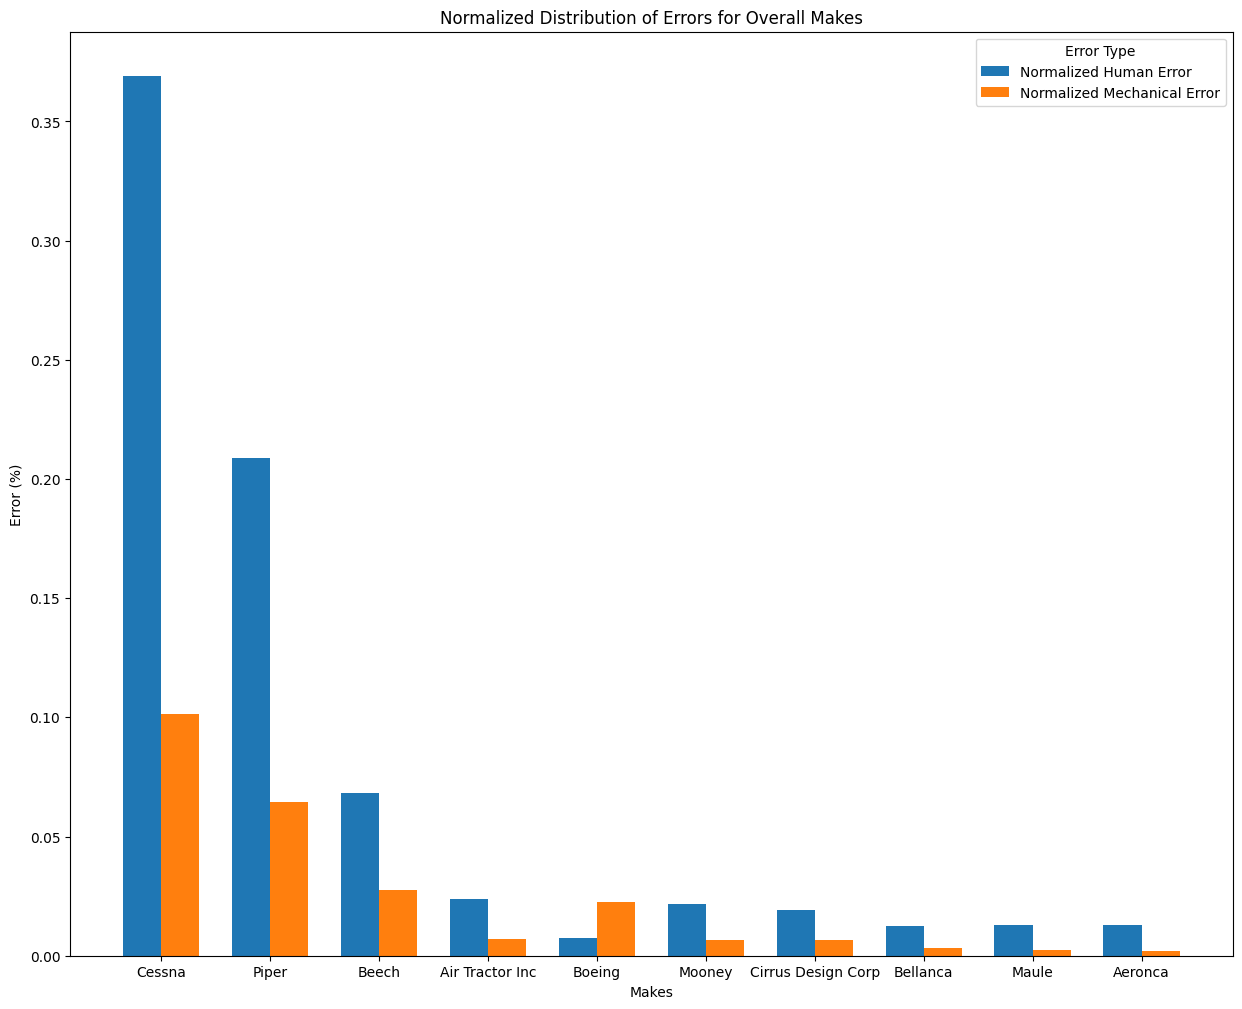

In [62]:
# Importing matplotlib for data visualization
import matplotlib.pyplot as plt
import numpy as np

# Reshape the data using pd.melt()
melted_df = pd.melt(normalized_df, id_vars='Makes', value_vars=['Normalized Human Error', 'Normalized Mechanical Error'])

# Create the side-by-side bar plot
# Setting up the plot
fig, ax = plt.subplots(figsize=(15, 12))

# Get unique Makes and the number of categories
makes = melted_df['Makes'].unique()
n_makes = len(makes)
bar_width = 0.35  # Width of the bars

# Create an array for the x positions
index = np.arange(n_makes)

# Separate the values for each error type
human_error = melted_df[melted_df['variable'] == 'Normalized Human Error']['value'].values
mechanical_error = melted_df[melted_df['variable'] == 'Normalized Mechanical Error']['value'].values

# Create bar plots
bars1 = ax.bar(index, human_error, bar_width, label='Normalized Human Error')
bars2 = ax.bar(index + bar_width, mechanical_error, bar_width, label='Normalized Mechanical Error')

# Customize the legend and axes labels
ax.set_title('Normalized Distribution of Errors for Overall Makes')
ax.set_xticks(index + bar_width / 2)  # Set x-ticks to the center of the grouped bars
ax.set_xticklabels(makes)
ax.set_xlabel('Makes')
ax.set_ylabel('Error (%)')
ax.legend(title='Error Type')

# Save the figure
plt.savefig('matplotlib_normalized_errors3.png')
# Displaying the plot
plt.show()


### Human and Mechanical Error Analysis

From the graph, we can observe the following:

#### 1. **Cessna's High Error Rates**
   - **Cessna** has the highest rates of both **human error** and **mechanical error**, which aligns with its earlier ranking as having the highest number of accidents.
   - This suggests that **Cessna may lack sufficient safety measures** in place, making it a riskier investment.

#### 2. **Boeing's Mechanical Error Trend**
   - Interestingly, **Boeing** stands out as the only airplane make with more **mechanical errors** than **human errors**.
   - To dive deeper into this, we will analyze which specific **Boeing models** are responsible for the majority of these mechanical errors.

In [63]:
boeing_df = data.groupby(['Make', 'Model', 'source_cause']).agg({'source_cause':
                                                                          'count'}).rename(columns = {'source_cause': 'Count of Errors'})
boeing_df = boeing_df.iloc[866:951]
boeing_df = boeing_df.sort_values('Count of Errors', ascending = False) #sorting the values from highest to lowest
boeing_df.head()

Count of Errors
Make   Model source_cause                 
Cessna U206G Human                      24
       R182  Human                      24
       T182T Human                      23
       T210  Human                      22
       T210L Human                      21

Overall, the majority of Boeing models have fewer than 10 instances of mechanical or human error, with Model 737 leading in mechanical errors with a total of 24 occurrences.

In [64]:
topten_updated_df = data

In [65]:
topten_updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9607 entries, 0 to 9606
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              9607 non-null   int64  
 1   Event.Id                9607 non-null   object 
 2   Investigation.Type      9607 non-null   object 
 3   Event.Date              9607 non-null   int64  
 4   Location                9607 non-null   object 
 5   Country                 9607 non-null   object 
 6   Injury.Severity         9607 non-null   object 
 7   Aircraft.damage         9607 non-null   object 
 8   Aircraft.Category       9607 non-null   object 
 9   Make                    9607 non-null   object 
 10  Model                   9607 non-null   object 
 11  Number.of.Engines       9607 non-null   float64
 12  Air.carrier             5400 non-null   object 
 13  Total.Fatal.Injuries    9607 non-null   float64
 14  Total.Serious.Injuries  9607 non-null   

In [66]:
top_ten_makes = topten_updated_df.Make.value_counts()
top_ten_makes

Make
Cessna                4638
Piper                 2691
Beech                  935
Boeing                 291
Mooney                 238
Air Tractor Inc        192
Cirrus Design Corp     169
Bellanca               159
Maule                  150
Aeronca                144
Name: count, dtype: int64

In [67]:
topten_updated_df.loc[:,'Total.Affected.Pass'] = topten_updated_df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum(axis=1)

In [68]:
topten_updated_df['Total.Affected.Pass'].value_counts()

Total.Affected.Pass
0.0      6082
1.0      1817
2.0      1106
3.0       292
4.0       204
5.0        54
6.0        22
7.0        10
10.0        3
8.0         3
13.0        2
9.0         2
12.0        2
190.0       1
26.0        1
47.0        1
88.0        1
22.0        1
21.0        1
134.0       1
11.0        1
Name: count, dtype: int64

In [69]:
topten_updated_df = topten_updated_df[topten_updated_df['Total.Affected.Pass'] != 0.0]

In [70]:
topten_updated_df['Total.Affected.Pass'].value_counts()

Total.Affected.Pass
1.0      1817
2.0      1106
3.0       292
4.0       204
5.0        54
6.0        22
7.0        10
10.0        3
8.0         3
13.0        2
12.0        2
9.0         2
134.0       1
21.0        1
22.0        1
26.0        1
190.0       1
47.0        1
88.0        1
11.0        1
Name: count, dtype: int64

Text(0.5, 1.0, 'Make by Total Affected Passengers')

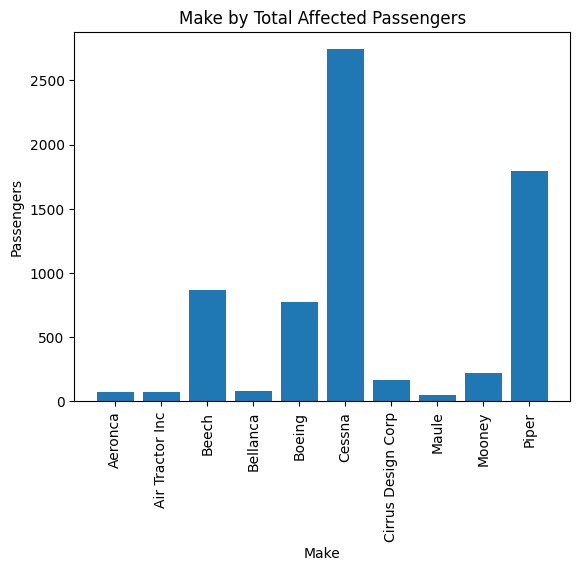

In [71]:
#comparing minor, serious, fatal passengers to Make of plane
pass_affect = topten_updated_df.groupby('Make')['Total.Affected.Pass'].sum()

# Setting up the plot
fig, ax = plt.subplots()
ax.bar(pass_affect.index, pass_affect.values)

ax.tick_params(axis = 'x', rotation = 90)
ax.set_ylabel('Passengers')
ax.set_xlabel('Make')
ax.set_title('Make by Total Affected Passengers')

In [72]:
#making a fatalities column for ratio of fatalities to all affected (minor, serious, fatal)
topten_updated_df['Fatalities'] = topten_updated_df['Total.Fatal.Injuries'] / topten_updated_df['Total.Affected.Pass']

C:\Users\user\AppData\Local\Temp\ipykernel_9776\1491105320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topten_updated_df['Fatalities'] = topten_updated_df['Total.Fatal.Injuries'] / topten_updated_df['Total.Affected.Pass']


Text(0.5, 1.0, 'Ratio of Make by Fatalities')

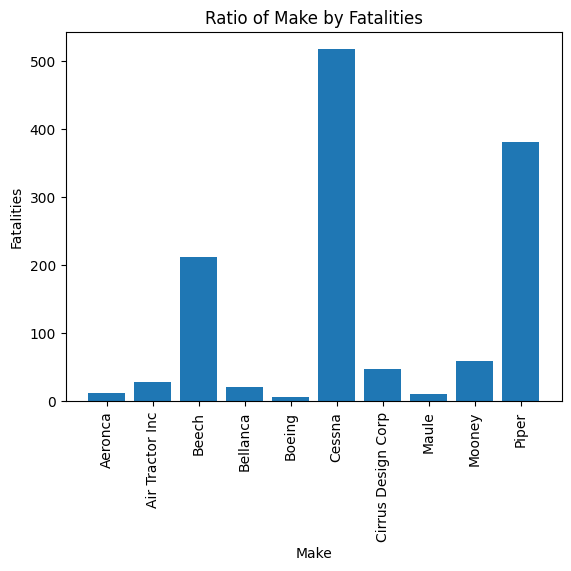

In [73]:
#graph comparing fatalities and Make of airplane
fatal_affect = topten_updated_df.groupby('Make')['Fatalities'].sum()

# Setting up the plot
fig, ax = plt.subplots()
ax.bar(fatal_affect.index, fatal_affect.values)

ax.tick_params(axis = 'x', rotation = 90)
ax.set_ylabel('Fatalities')
ax.set_xlabel('Make')
ax.set_title('Ratio of Make by Fatalities')

In [74]:
#making column for uninjured ratio to all (injured & uninjured)
topten_updated_df['Uninjured.Ratio'] = topten_updated_df['Total.Uninjured'] / (topten_updated_df['Total.Affected.Pass'] + topten_updated_df['Total.Uninjured'])

C:\Users\user\AppData\Local\Temp\ipykernel_9776\734154767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topten_updated_df['Uninjured.Ratio'] = topten_updated_df['Total.Uninjured'] / (topten_updated_df['Total.Affected.Pass'] + topten_updated_df['Total.Uninjured'])


Text(0.5, 1.0, 'Ratio of Make by Uninjured')

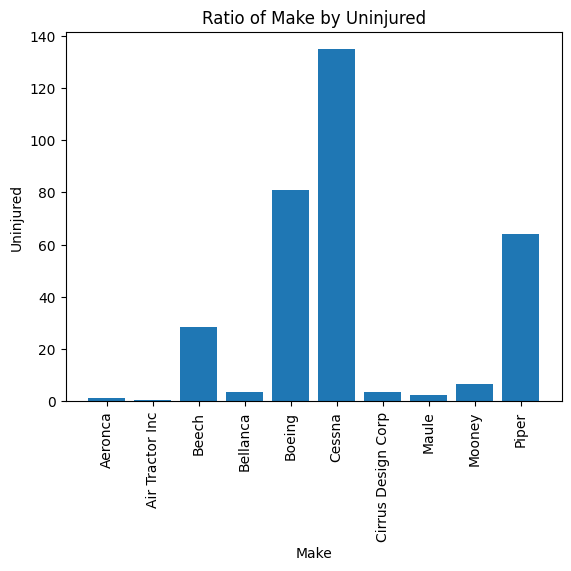

In [75]:
#graph for ratio of uninjured compared to make of airplane
uninjured_affect = topten_updated_df.groupby('Make')['Uninjured.Ratio'].sum()

# Setting up the plot
fig, ax = plt.subplots()
ax.bar(uninjured_affect.index, uninjured_affect.values)

ax.tick_params(axis = 'x', rotation = 90)
ax.set_ylabel('Uninjured')
ax.set_xlabel('Make')
ax.set_title('Ratio of Make by Uninjured')

### Risk of Personal Injury

In this analysis, we focused on the total number of passengers involved in adverse events from 2008 to 2022, considering minor injuries, serious injuries, and fatalities. Here are the key findings:

#### 1. **Total Number of Injuries (Top 10 Airplane Makes)**
   - **Cessna** had the highest number of injuries across all categories.
   - **Maule** had the lowest number of injuries.

#### 2. **Fatalities Analysis**
   - We created a **fatality-to-injury ratio** (fatalities compared to the total number of injuries) to assess which airplane makes have the highest fatality risk.
   - **Cirrus Design Corp.** had the highest fatality ratio, indicating a higher risk of fatalities in adverse events.
   - **Boeing** had the lowest fatality ratio, making it the safest in terms of fatalities.

#### 3. **Uninjured Passenger Ratio**
   - To understand which airplanes have the highest safety ratings, we analyzed the ratio of uninjured passengers in adverse events.
   - **Boeing** had the highest uninjured ratio, suggesting it is the safest airplane make overall.
   - **Mooney** had the lowest ratio of uninjured passengers.

### Recommendation
Based on the findings:
- **Avoid investing in Cessna aircraft**, due to the high injury rates.
- **Consider further evaluation of Boeing and Maule airplanes**, which consistently showed lower injury and fatality rates, with Boeing having the highest uninjured passenger ratio.




### Key Recommendations for Aircraft Investment

#### 1. **Invest in Boeing Aircraft**
   - **Low accident rates**: Boeing planes have the lowest ratio of accidents to total events.
   - **Safety advantage**: Passengers on Boeing flights experience fewer injuries and fatalities compared to other brands.
   - **Boeing Model Recommendation**: Any Boeing model **except the 737** is a safe choice.

#### 2. **Key Considerations for Boeing Investments**
   - **Mechanical Error Risk**: Boeing is an outlier, showing more accidents due to mechanical issues than human error.
   - **Maintenance Focus**: To mitigate mechanical issues, the company should invest in a **high-quality maintenance team**.

#### 3. **Focus on Commercial Aircraft over Private Planes**
   - **Higher risk in private aircraft**: Most accidents occur with smaller, private aircraft, especially those with one-engine or reciprocating engines.
   - **Examples**: Aircraft like the Cessna have higher rates of human error and inadequate safety measures, making them riskier investments.